In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

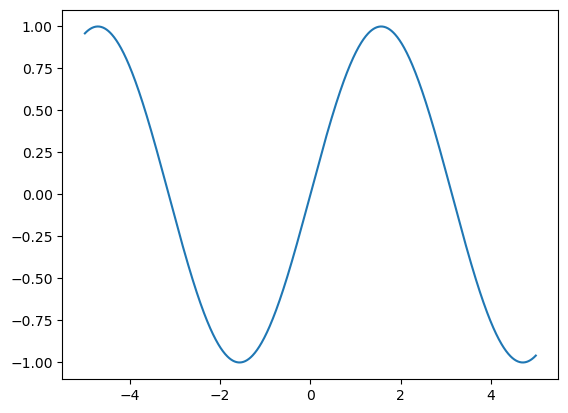

In [51]:
xs = torch.linspace(-5,5,1001)
ys = torch.sin(xs)
plt.plot(xs, ys)

In [52]:
def ReLU(n):
    return np.maximum(0, n)

In [53]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(1, 5)
        self.l2 = nn.Linear(5, 5)
        self.l3 = nn.Linear(5, 1)
        self.activation_function = nn.Tanh()
    
    def forward(self, x):
        o = self.l1(x)
        o = self.activation_function(o)
        o = self.l2(o)
        o = self.activation_function(o)
        o = self.l3(o)
        return o


In [54]:
net = NN()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
losses = []


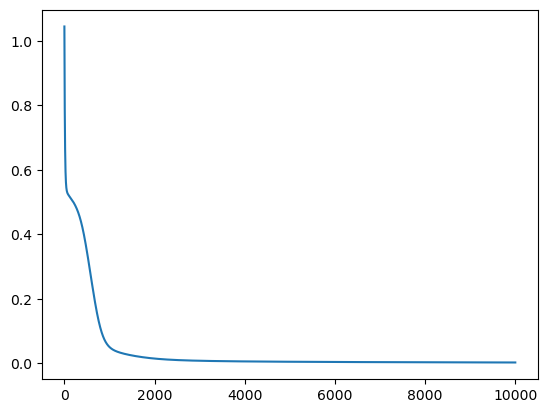

In [55]:
for i in range(10000):

    optimizer.zero_grad()
    y_preds = net(xs.view(-1, 1))
    loss:torch.tensor = ((y_preds.view(-1) - ys)**2).sum() / len(xs)

    loss.backward()
    losses.append(loss.item())
    # if i % 100 == 0:
    #     print(loss.item())
    optimizer.step()
plt.plot(losses)

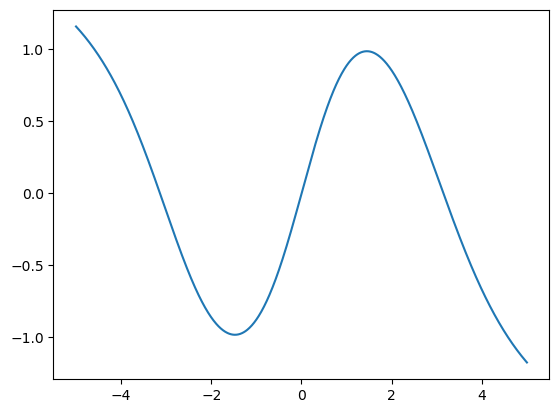

In [56]:
plt.plot(xs, net(xs.view(-1,1)).detach().view(-1))

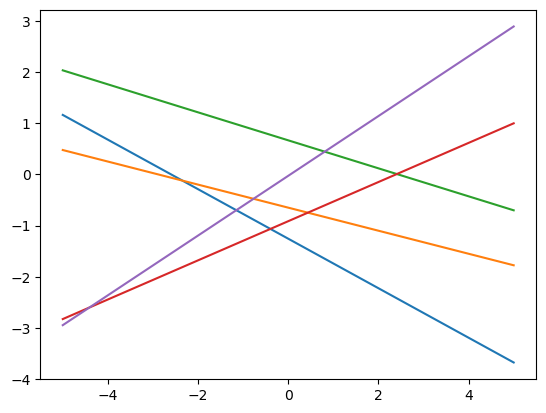

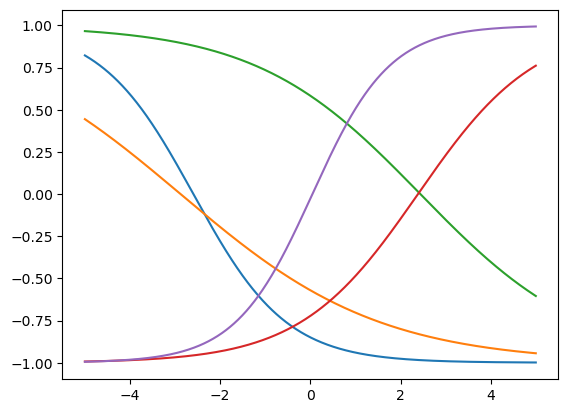

In [57]:
plt.plot(xs, net.l1(xs.view(-1,1)).detach())
plt.show()
capa1 = net.activation_function(net.l1(xs.view(-1,1))).detach()
plt.plot(xs, capa1)
plt.show()

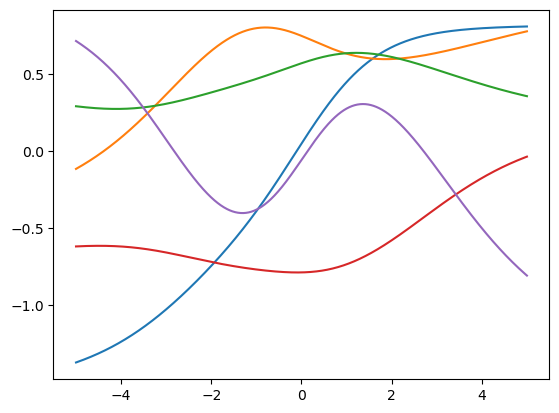

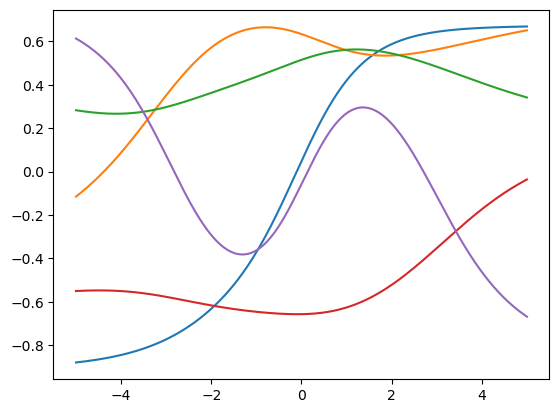

In [58]:
plt.plot(xs, net.l2(capa1).detach())
plt.show()
capa2 = net.activation_function(net.l2(capa1)).detach()
plt.plot(xs, net.activation_function(net.l2(capa1)).detach())
plt.show()

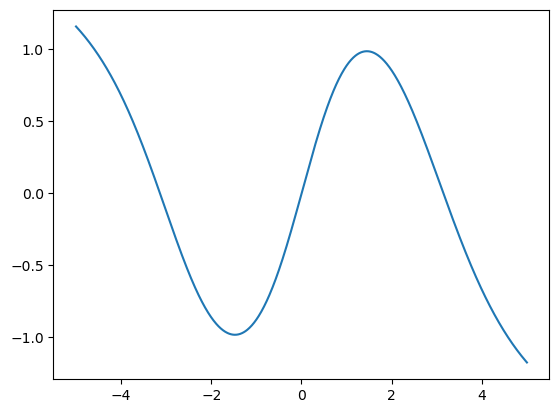

In [59]:
plt.plot(xs, net.l3(capa2).detach())
plt.show()

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.l1 = nn.Linear(2, 3)
        # self.l2 = nn.Linear(5, 5)
        # self.l3 = nn.Linear(5, 1)
        self.activation_function = nn.Tanh()
        self.softmax = nn.Softmax()
    
    def forward(self, x):
        o = self.l1(x)
        # o = self.activation_function(o)
        # o = self.l2(o)
        # o = self.activation_function(o)
        # o = self.l3(o)
        o = self.softmax(o)
        return o


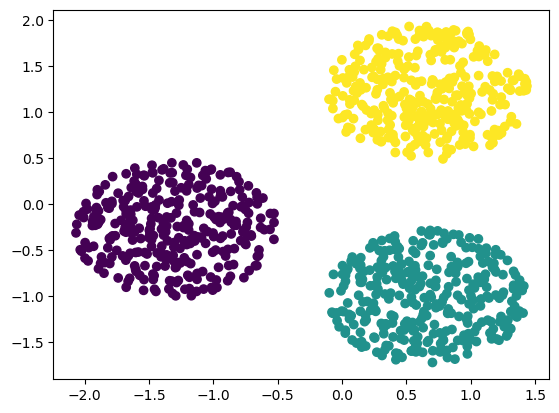

In [161]:
# x = np.array([[0,0], [0,1], [1,1], [5,5], [6,4], [6,5], [6,-2], [5,-1.5], [6, -1.2]])
# y = np.array([0,0,0,1,1,1,2,2,2])

i = 0
x = []
y = []
while i < 1000:
    x1 = np.random.uniform()  * 10
    x2 = np.random.uniform() * 10
    if (x1 - 3)** 2  + (x2 - 4) ** 2 <= 4:
        x.append([x1, x2])
        y.append(0)
        i += 1
    elif (x1 - 8)** 2  + (x2  -2) ** 2 <= 4:
        x.append([x1, x2])
        y.append(1)
        i += 1
    elif (x1 - 8)** 2  + (x2 - 8) ** 2 <= 4:
        x.append([x1, x2])
        y.append(2)
        i += 1


x = np.array(x)

x[:,0] = (x[:,0] - np.mean(x[:, 0]))/ np.std(x[:, 0])
x[:,1] = (x[:,1] - np.mean(x[:, 1]))/ np.std(x[:, 1])

plt.scatter(x[:,0], x[:, 1], c = y)



In [162]:
yy, xx = torch.tensor(np.eye(3)[y], dtype = torch.float32), torch.tensor(x, dtype=torch.float32)

In [163]:
xx, yy

(tensor([[ 0.9820, -1.4125],
         [ 0.1458, -0.5851],
         [-1.5144, -0.5446],
         ...,
         [-0.8235, -0.1904],
         [ 0.8610, -1.5626],
         [ 0.8628,  1.7762]]),
 tensor([[0., 1., 0.],
         [0., 1., 0.],
         [1., 0., 0.],
         ...,
         [1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]))

In [164]:
net = NN()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.01)
losses = []

In [165]:
from torch.nn.functional import nll_loss

In [166]:
criterion = nn.MultiLabelSoftMarginLoss()

c:\Users\jurko\anaconda3\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


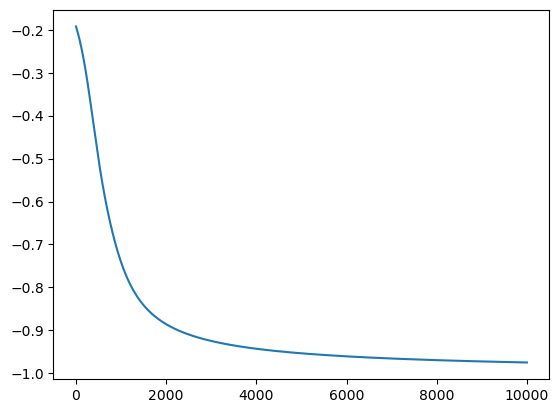

In [167]:
for i in range(10000):

    optimizer.zero_grad()
    y_preds = net(xx)
    # loss:torch.tensor = ((y_preds.view(-1) - ys)**2).sum() / len(xs)
    loss = nll_loss(y_preds, torch.tensor(y, dtype=torch.long))
    loss.backward()
    losses.append(loss.item())
    # if i % 100 == 0:
    #     print(loss.item())
    optimizer.step()
plt.plot(losses)

In [168]:
y, y_preds.round()

([1,
  1,
  0,
  0,
  0,
  2,
  1,
  2,
  2,
  2,
  2,
  0,
  0,
  1,
  1,
  2,
  1,
  2,
  0,
  1,
  2,
  1,
  2,
  2,
  1,
  2,
  0,
  0,
  0,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  1,
  2,
  0,
  0,
  1,
  1,
  0,
  2,
  2,
  0,
  1,
  1,
  2,
  1,
  2,
  0,
  1,
  0,
  2,
  0,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  2,
  1,
  1,
  0,
  1,
  1,
  2,
  1,
  1,
  2,
  0,
  2,
  2,
  0,
  2,
  1,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  1,
  0,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  2,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  2,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  2,
  0,
  1,
  0,
  2,
  1,
  0,
  1,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  1,
  2,
  2,
  1,
  2,
  0,
  1,
  1,
  0,
  1,
  0,
  2,
  0,
  1,
  1,
  0,
  0,
  2,
  0,
  1,
  2,
  2,
  2,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  2,
  2,
  0,
  1,
  2,
  2,
  2,
  1,
  2,
  2,
  2,
  1,
  1,
  0,
  1,
  1,
  1,
  2,
  0,
  1,
  2,
  0,
  2,
  0,
  2,
  0,


tensor([-0.0495,  0.0522, -0.0351])


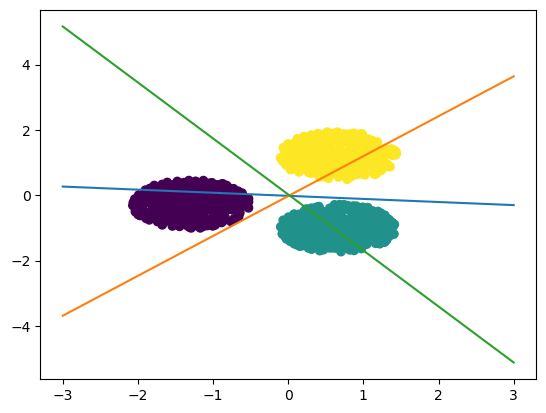

In [173]:
w, b = list(i.detach() for i in net.l1.parameters())
w[0,:]
print(b)
xxx = np.linspace(-3, 3, 10)
plt.scatter(x[:,0], x[:, 1], c = y)
for i in range(3):
    w1, w2 = w[i,:]
    r = -(w2 * xxx + b[i]) / w1
    plt.plot(xxx, r)


C:\Users\jurko\AppData\Local\Temp\ipykernel_10560\4120198101.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x[:, 0], x[:, 1], cmap=plt.cm.Paired)


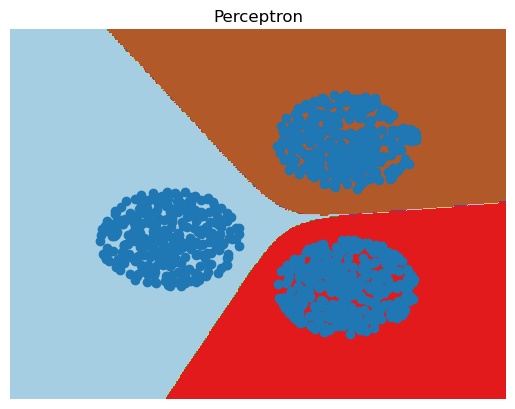

In [211]:
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

# clf = net(n_iter=100).fit(X, Y)

# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = net(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype = torch.float32))

# Put the result into a color plot
Z = np.argmax(Z.round().detach().numpy(), axis = 1)
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points

ax.set_title('Perceptron')
ax.scatter(x[:, 0], x[:, 1], cmap=plt.cm.Paired)